In [ ]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/home/l2-52/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Data Class Proportions:
Normal: 621 OSCC: 2032


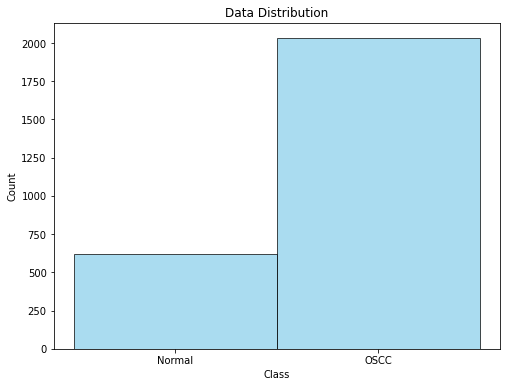

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/l2-52/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a given folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label to the labels list
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert data to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Print class proportions
print("Data Class Proportions:")
print("Normal:", np.sum(all_labels == 0), "OSCC:", np.sum(all_labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(all_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


Balanced Images: (1200, 224, 224)
Balanced Labels: (1200,)
Normal Images: (600, 224, 224)
OSCC Images: (600, 224, 224)
X_train shape: (960, 224, 224)
X_test shape: (240, 224, 224)
y_train shape: (960,)
y_test shape: (240,)


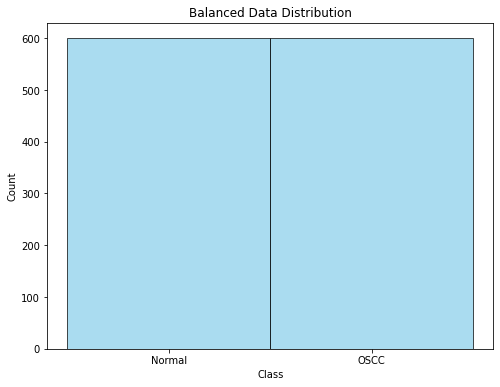

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = "/home/l2-52/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (NORMAL and OSCC)
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for NORMAL, 1 for OSCC) to the labels list
        labels.append(0 if class_name == 'NORMAL' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = images[labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = images[labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = labels[labels == 0][:600]
oscc_labels = labels[labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Print the balanced data
print("Balanced Images:", balanced_images.shape)
print("Balanced Labels:", balanced_labels.shape)

# Print the data separately for each class
print("Normal Images:", normal_images.shape)
print("OSCC Images:", oscc_images.shape)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Plot histogram for the balanced class distribution
plt.figure(figsize=(8, 6))
plt.hist(balanced_labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Normal', 'OSCC'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balanced Data Distribution')
plt.show()


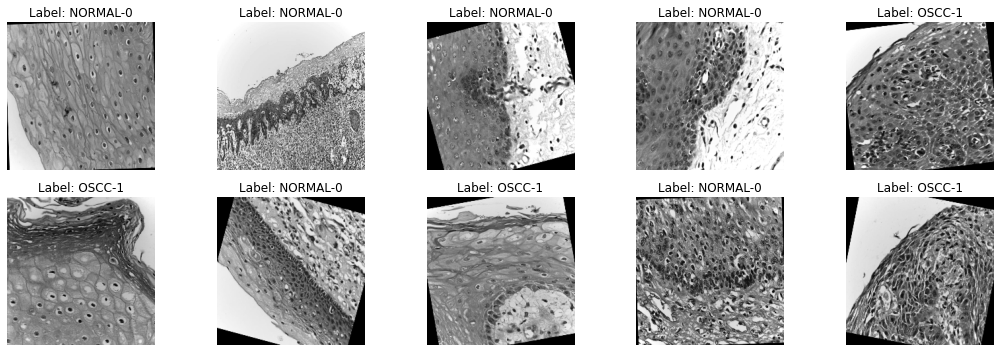

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL-0" or "OSCC-1"
    label_text = 'NORMAL-0' if label == 0 else 'OSCC-1'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


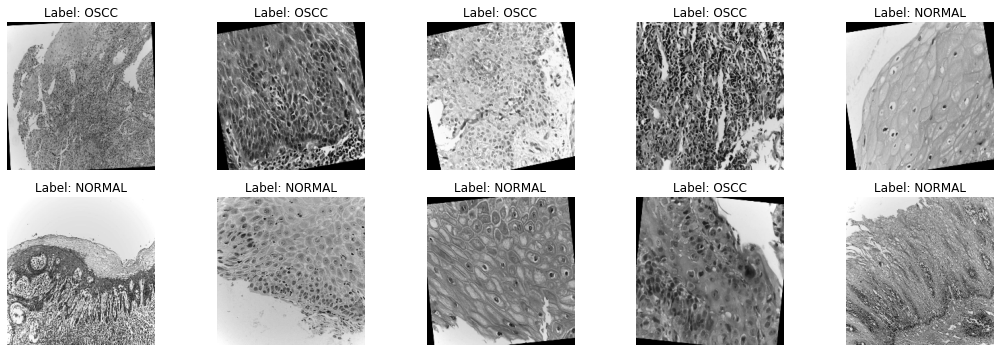

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Define the label text for display as "NORMAL" or "OSCC"
    label_text = 'NORMAL' if label == 0 else 'OSCC'

    # Add a subplot for the current image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label_text}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


# Inception V3

# Dense Layers

2024-11-15 15:48:30.126440: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-15 15:48:30.340129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 15:48:30.418609: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 15:48:30.439831: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-15 15:48:30.594562: I tensorflow/core/platform/cpu_feature_guar

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 719ms/step - accuracy: 0.5567 - auc: 0.6053 - auc_1: 0.6101 - false_negatives: 109.4194 - false_positives: 104.1936 - loss: 0.9345 - precision: 0.5525 - recall: 0.5630 - true_negatives: 151.7419 - true_positives: 145.6129 - val_accuracy: 0.7667 - val_auc: 0.8311 - val_auc_1: 0.8244 - val_false_negatives: 32.0000 - val_false_positives: 24.0000 - val_loss: 0.5099 - val_precision: 0.7818 - val_recall: 0.7288 - val_true_negatives: 98.0000 - val_true_positives: 86.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 748ms/step - accuracy: 0.7759 - auc: 0.8647 - auc_1: 0.8719 - false_negatives: 64.4194 - false_positives: 47.7097 - loss: 0.4564 - precision: 0.7970 - recall: 0.7429 - true_negatives: 205.8387 - true_positives: 193.0000 - val_accuracy: 0.6125 - val_auc: 0.8513 - val_auc_1: 0.8376 - val_false_negatives: 4.0000 - val_false_positives: 89.0000 - val_loss: 0.7513 - val_precision: 0.5616 - val_recall: 0.9661 - val_true_negatives: 33.0000 - val_true_

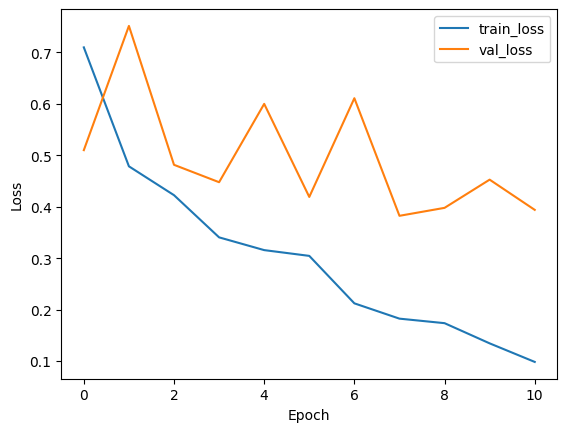

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 0.8138 - auc: 0.9033 - auc_1: 0.8831 - false_negatives: 15.1111 - false_positives: 13.2222 - loss: 0.4040 - precision: 0.7888 - recall: 0.7927 - true_negatives: 69.2222 - true_positives: 55.3333
Test Accuracy: 82.08%
Precision: 0.84
Recall: 0.79
AUC-ROC: 0.91
AUC-PR: 0.92
TN: 104.0, FP: 18.0, FN: 25.0, TP: 93.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 642ms/step
Confusion Matrix:
[[104  18]
 [ 25  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       122
           1       0.84      0.79      0.81       118

    accuracy                           0.82       240
   macro avg       0.82      0.82      0.82       240
weighted avg       0.82      0.82      0.82       240

AUC Score: 0.82
Precision: 0.84
Recall: 0.79
F1 Score: 0.81
PR AUC: 0.87
Cohen's Kappa Coefficient: 0.64
Matthews Correlation Coefficient (MCC): 0.64
Balanced Accuracy: 0.82
Time taken: 286.27 seconds
 atch

                                                                                                  
 batch_normalization_156 (B  (None, 17, 17, 192)          576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 17, 17, 192)          576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 8, 8, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 8, 8, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 8, 8, 320)            960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 8, 8, 192)            576       ['conv2d_169[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, 8, 8, 192)            576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

Epoch 8/50
15/15 [==============================] - 9s 618ms/step - loss: 0.2950 - accuracy: 0.8458 - precision_1: 0.8717 - recall_1: 0.8140 - auc_2: 0.9482 - auc_3: 0.9532 - true_negatives_1: 209.0000 - false_positives_1: 29.0000 - false_negatives_1: 45.0000 - true_positives_1: 197.0000 - val_loss: 0.4344 - val_accuracy: 0.8000 - val_precision_1: 0.8696 - val_recall_1: 0.6897 - val_auc_2: 0.8978 - val_auc_3: 0.8995 - val_true_negatives_1: 56.0000 - val_false_positives_1: 6.0000 - val_false_negatives_1: 18.0000 - val_true_positives_1: 40.0000
Epoch 9/50
15/15 [==============================] - 9s 623ms/step - loss: 0.2477 - accuracy: 0.8958 - precision_1: 0.9068 - recall_1: 0.8843 - auc_2: 0.9654 - auc_3: 0.9684 - true_negatives_1: 216.0000 - false_positives_1: 22.0000 - false_negatives_1: 28.0000 - true_positives_1: 214.0000 - val_loss: 0.3776 - val_accuracy: 0.7833 - val_precision_1: 0.7759 - val_recall_1: 0.7759 - val_auc_2: 0.9132 - val_auc_3: 0.9165 - val_true_negatives_1: 49.0000

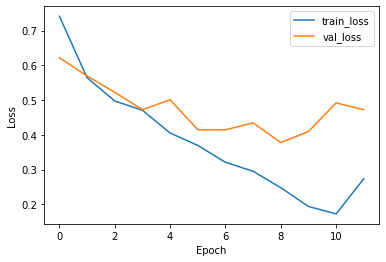

4/4 [==============================] - 2s 458ms/step - loss: 0.3776 - accuracy: 0.7833 - precision_1: 0.7759 - recall_1: 0.7759 - auc_2: 0.9132 - auc_3: 0.9165 - true_negatives_1: 49.0000 - false_positives_1: 13.0000 - false_negatives_1: 13.0000 - true_positives_1: 45.0000
Test Accuracy: 78.33%
Precision: 0.78
Recall: 0.78
AUC-ROC: 0.91
AUC-PR: 0.92
TN: 49.0, FP: 13.0, FN: 13.0, TP: 45.0
4/4 [==============================] - 2s 457ms/step
Confusion Matrix:
[[49 13]
 [13 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        62
           1       0.78      0.78      0.78        58

    accuracy                           0.78       120
   macro avg       0.78      0.78      0.78       120
weighted avg       0.78      0.78      0.78       120

AUC Score: 0.78
Precision: 0.78
Recall: 0.78
F1 Score: 0.78
PR AUC: 0.83
Cohen's Kappa Coefficient: 0.57
Matthews Correlation Coefficient (MCC): 0.57
Balanced Accuracy: 

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add a Global Average Pooling layer to reduce the spatial dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a Dense layer with 512 units and relu activation
x = Dense(512, activation='relu')(x)

# Add another Dense layer with 256 units and relu activation
x = Dense(256, activation='relu')(x)

# Add a final Dense layer with sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the new Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 779ms/step - accuracy: 0.5597 - auc_2: 0.6131 - auc_3: 0.6016 - false_negatives_1: 105.5484 - false_positives_1: 106.2581 - loss: 0.7923 - precision_1: 0.5560 - recall_1: 0.5494 - true_negatives_1: 149.9355 - true_positives_1: 149.2258 - val_accuracy: 0.6917 - val_auc_2: 0.7896 - val_auc_3: 0.7785 - val_false_negatives_1: 15.0000 - val_false_positives_1: 59.0000 - val_loss: 0.5990 - val_precision_1: 0.6358 - val_recall_1: 0.8729 - val_true_negatives_1: 63.0000 - val_true_positives_1: 103.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 742ms/step - accuracy: 0.7630 - auc_2: 0.8505 - auc_3: 0.8612 - false_negatives_1: 71.1613 - false_positives_1: 47.7097 - loss: 0.4825 - precision_1: 0.7894 - recall_1: 0.7322 - true_negatives_1: 208.5806 - true_positives_1: 183.5161 - val_accuracy: 0.7792 - val_auc_2: 0.8438 - val_auc_3: 0.8427 - val_false_negatives_1: 21.0000 - val_false_positives_1: 32.0000 - val_loss: 0.5010 - val_precision_1: 0.7519 - val_re

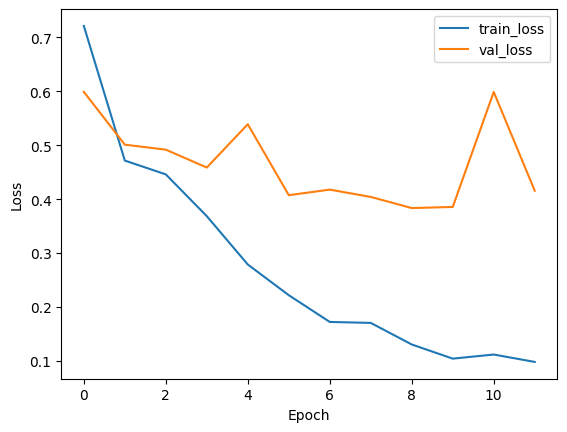

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.8260 - auc_2: 0.9137 - auc_3: 0.9005 - false_negatives_1: 13.7778 - false_positives_1: 11.2222 - loss: 0.4216 - precision_1: 0.8078 - recall_1: 0.7923 - true_negatives_1: 71.2222 - true_positives_1: 56.6667
Test Accuracy: 85.00%
Precision: 0.87
Recall: 0.82
AUC-ROC: 0.92
AUC-PR: 0.93
TN: 107.0, FP: 15.0, FN: 21.0, TP: 97.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 639ms/step
Confusion Matrix:
[[107  15]
 [ 21  97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       122
           1       0.87      0.82      0.84       118

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

AUC Score: 0.85
Precision: 0.87
Recall: 0.82
F1 Score: 0.84
PR AUC: 0.89
Cohen's Kappa Coefficient: 0.70
Matthews Correlation Coefficient (MCC): 0.70
Balanced Accuracy: 0.85
Time taken: 281.69

                                                                                                  
 batch_normalization_250 (B  (None, 17, 17, 192)          576       ['conv2d_250[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_255 (B  (None, 17, 17, 192)          576       ['conv2d_255[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_250 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_250[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_259 (Conv2D)         (None, 8, 8, 320)            552960    ['activation_258[0][0]']      
                                                                                                  
 conv2d_263 (Conv2D)         (None, 8, 8, 192)            331776    ['activation_262[0][0]']      
                                                                                                  
 batch_normalization_259 (B  (None, 8, 8, 320)            960       ['conv2d_259[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_263 (B  (None, 8, 8, 192)            576       ['conv2d_263[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_270 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_270[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_271 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_271[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_272 (B  (None, 8, 8, 192)            576       ['conv2d_272[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_276 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_276[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_279 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_279[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_280 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_280[0][0
 )                                                                  ]']                           
          

Epoch 8/150
15/15 [==============================] - 9s 635ms/step - loss: 0.3534 - accuracy: 0.8208 - precision_2: 0.8145 - recall_2: 0.8347 - auc_4: 0.9240 - auc_5: 0.9327 - true_negatives_2: 192.0000 - false_positives_2: 46.0000 - false_negatives_2: 40.0000 - true_positives_2: 202.0000 - val_loss: 0.4445 - val_accuracy: 0.8000 - val_precision_2: 0.8864 - val_recall_2: 0.6724 - val_auc_4: 0.8800 - val_auc_5: 0.8868 - val_true_negatives_2: 57.0000 - val_false_positives_2: 5.0000 - val_false_negatives_2: 19.0000 - val_true_positives_2: 39.0000
Epoch 9/150
15/15 [==============================] - 9s 636ms/step - loss: 0.2878 - accuracy: 0.8771 - precision_2: 0.8735 - recall_2: 0.8843 - auc_4: 0.9592 - auc_5: 0.9619 - true_negatives_2: 207.0000 - false_positives_2: 31.0000 - false_negatives_2: 28.0000 - true_positives_2: 214.0000 - val_loss: 0.3902 - val_accuracy: 0.8167 - val_precision_2: 0.8214 - val_recall_2: 0.7931 - val_auc_4: 0.9002 - val_auc_5: 0.9095 - val_true_negatives_2: 52.00

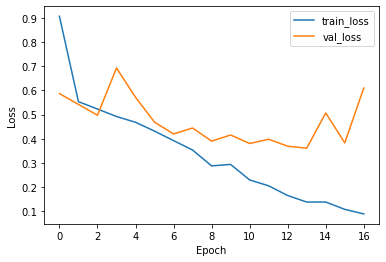

4/4 [==============================] - 2s 452ms/step - loss: 0.3611 - accuracy: 0.8250 - precision_2: 0.8364 - recall_2: 0.7931 - auc_4: 0.9230 - auc_5: 0.9259 - true_negatives_2: 53.0000 - false_positives_2: 9.0000 - false_negatives_2: 12.0000 - true_positives_2: 46.0000
Test Accuracy: 82.50%
Precision: 0.84
Recall: 0.79
AUC-ROC: 0.92
AUC-PR: 0.93
TN: 53.0, FP: 9.0, FN: 12.0, TP: 46.0
4/4 [==============================] - 2s 457ms/step
Confusion Matrix:
[[53  9]
 [12 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        62
           1       0.84      0.79      0.81        58

    accuracy                           0.82       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.83      0.82      0.82       120

AUC Score: 0.82
Precision: 0.84
Recall: 0.79
F1 Score: 0.81
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.65
Matthews Correlation Coefficient (MCC): 0.65
Balanced Accuracy: 0.

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add a Global Average Pooling layer to reduce the spatial dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a Dense layer with 512 units and relu activation
x = Dense(512, activation='relu')(x)

# Add another Dense layer with 256 units and relu activation
x = Dense(256, activation='relu')(x)

# Add a final Dense layer with sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the new Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_188 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_188[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_188      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_189 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_188[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_189[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_189      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_190 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_189[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_190[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_190      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_190[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_191 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_191[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_191      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_192 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_191[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_192[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_192      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 779ms/step - accuracy: 0.5994 - auc_4: 0.6401 - auc_5: 0.6228 - false_negatives_2: 103.4839 - false_positives_2: 91.9355 - loss: 0.8043 - precision_2: 0.5870 - recall_2: 0.5446 - true_negatives_2: 162.9355 - true_positives_2: 152.6129 - val_accuracy: 0.7167 - val_auc_4: 0.8115 - val_auc_5: 0.8037 - val_false_negatives_2: 23.0000 - val_false_positives_2: 45.0000 - val_loss: 0.5456 - val_precision_2: 0.6786 - val_recall_2: 0.8051 - val_true_negatives_2: 77.0000 - val_true_positives_2: 95.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 742ms/step - accuracy: 0.7569 - auc_4: 0.8441 - auc_5: 0.8478 - false_negatives_2: 66.7419 - false_positives_2: 48.2581 - loss: 0.4846 - precision_2: 0.7827 - recall_2: 0.7232 - true_negatives_2: 207.1613 - true_positives_2: 188.8065 - val_accuracy: 0.7875 - val_auc_4: 0.8538 - val_auc_5: 0.8339 - val_false_negatives_2: 32.0000 - val_false_positives_2: 19.0000 - val_loss: 0.4795 - val_precision_2: 0.8190 - val_reca

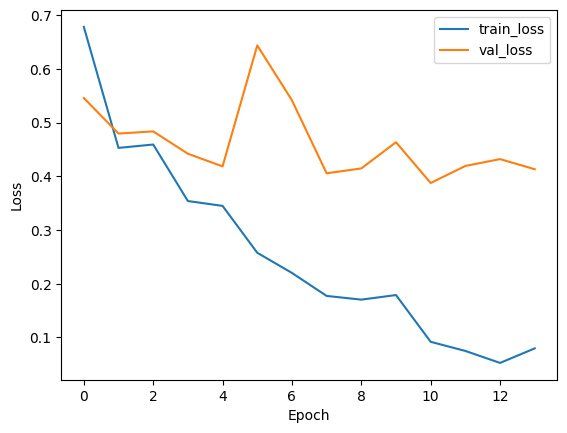

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.8254 - auc_4: 0.9155 - auc_5: 0.8815 - false_negatives_2: 12.2222 - false_positives_2: 13.7778 - loss: 0.4215 - precision_2: 0.7900 - recall_2: 0.8233 - true_negatives_2: 68.6667 - true_positives_2: 58.2222
Test Accuracy: 84.17%
Precision: 0.84
Recall: 0.84
AUC-ROC: 0.92
AUC-PR: 0.92
TN: 103.0, FP: 19.0, FN: 19.0, TP: 99.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 639ms/step
Confusion Matrix:
[[103  19]
 [ 19  99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       122
           1       0.84      0.84      0.84       118

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240

AUC Score: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
PR AUC: 0.88
Cohen's Kappa Coefficient: 0.68
Matthews Correlation Coefficient (MCC): 0.68
Balanced Accuracy: 0.84
Time taken: 326.03

                                                                                                  
 batch_normalization_344 (B  (None, 17, 17, 192)          576       ['conv2d_344[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_349 (B  (None, 17, 17, 192)          576       ['conv2d_349[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_344 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_344[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_353 (Conv2D)         (None, 8, 8, 320)            552960    ['activation_352[0][0]']      
                                                                                                  
 conv2d_357 (Conv2D)         (None, 8, 8, 192)            331776    ['activation_356[0][0]']      
                                                                                                  
 batch_normalization_353 (B  (None, 8, 8, 320)            960       ['conv2d_353[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_357 (B  (None, 8, 8, 192)            576       ['conv2d_357[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_364 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_364[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_365 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_365[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_366 (B  (None, 8, 8, 192)            576       ['conv2d_366[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_370 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_370[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_373 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_373[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_374 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_374[0][0
 )                                                                  ]']                           
          

Epoch 8/200
15/15 [==============================] - 9s 631ms/step - loss: 0.3073 - accuracy: 0.8667 - precision_3: 0.8589 - recall_3: 0.8802 - auc_6: 0.9445 - auc_7: 0.9466 - true_negatives_3: 203.0000 - false_positives_3: 35.0000 - false_negatives_3: 29.0000 - true_positives_3: 213.0000 - val_loss: 0.6464 - val_accuracy: 0.7250 - val_precision_3: 0.8571 - val_recall_3: 0.5172 - val_auc_6: 0.8743 - val_auc_7: 0.8656 - val_true_negatives_3: 57.0000 - val_false_positives_3: 5.0000 - val_false_negatives_3: 28.0000 - val_true_positives_3: 30.0000
Epoch 9/200
15/15 [==============================] - 9s 633ms/step - loss: 0.2638 - accuracy: 0.8896 - precision_3: 0.9056 - recall_3: 0.8719 - auc_6: 0.9596 - auc_7: 0.9608 - true_negatives_3: 216.0000 - false_positives_3: 22.0000 - false_negatives_3: 31.0000 - true_positives_3: 211.0000 - val_loss: 0.3973 - val_accuracy: 0.8250 - val_precision_3: 0.7606 - val_recall_3: 0.9310 - val_auc_6: 0.9195 - val_auc_7: 0.9227 - val_true_negatives_3: 45.00

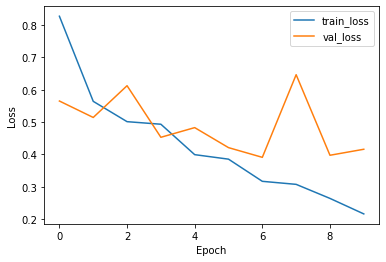

4/4 [==============================] - 2s 450ms/step - loss: 0.3909 - accuracy: 0.8083 - precision_3: 0.7869 - recall_3: 0.8276 - auc_6: 0.9027 - auc_7: 0.9120 - true_negatives_3: 49.0000 - false_positives_3: 13.0000 - false_negatives_3: 10.0000 - true_positives_3: 48.0000
Test Accuracy: 80.83%
Precision: 0.79
Recall: 0.83
AUC-ROC: 0.90
AUC-PR: 0.91
TN: 49.0, FP: 13.0, FN: 10.0, TP: 48.0
4/4 [==============================] - 3s 449ms/step
Confusion Matrix:
[[49 13]
 [10 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        62
           1       0.79      0.83      0.81        58

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120

AUC Score: 0.81
Precision: 0.79
Recall: 0.83
F1 Score: 0.81
PR AUC: 0.85
Cohen's Kappa Coefficient: 0.62
Matthews Correlation Coefficient (MCC): 0.62
Balanced Accuracy: 

In [ ]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add a Global Average Pooling layer to reduce the spatial dimensions
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a Dense layer with 512 units and relu activation
x = Dense(512, activation='relu')(x)

# Add another Dense layer with 256 units and relu activation
x = Dense(256, activation='relu')(x)

# Add a final Dense layer with sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the new Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Dropout + Dense Layers

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_282 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_282[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_282      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_283 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_282[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_283[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_283      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_284 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_283[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_284[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_284      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 73, 73,    │          0 │ activation_284[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_285 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_12… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_285[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_285      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_286 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_285[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_286[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_286      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 89,043,745 (339.67 MB)

 Trainable params: 67,240,961 (256.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5328 - auc_6: 0.5436 - auc_7: 0.5434 - false_negatives_3: 123.1290 - false_positives_3: 115.5161 - loss: 12.8323 - precision_3: 0.5512 - recall_3: 0.5089 - true_negatives_3: 135.6774 - true_positives_3: 136.6452 - val_accuracy: 0.5250 - val_auc_6: 0.5254 - val_auc_7: 0.5519 - val_false_negatives_3: 114.0000 - val_false_positives_3: 0.0000e+00 - val_loss: 10.1844 - val_precision_3: 1.0000 - val_recall_3: 0.0339 - val_true_negatives_3: 122.0000 - val_true_positives_3: 4.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6407 - auc_6: 0.6756 - auc_7: 0.6649 - false_negatives_3: 88.9677 - false_positives_3: 84.1936 - loss: 4.0812 - precision_3: 0.6406 - recall_3: 0.5983 - true_negatives_3: 172.4839 - true_positives_3: 165.3226 - val_accuracy: 0.6667 - val_auc_6: 0.7583 - val_auc_7: 0.7362 - val_false_negatives_3: 38.0000 - val_false_positives_3: 42.0000 - val_loss: 1.0550 - val_precision_3: 0.6557 - val_recal

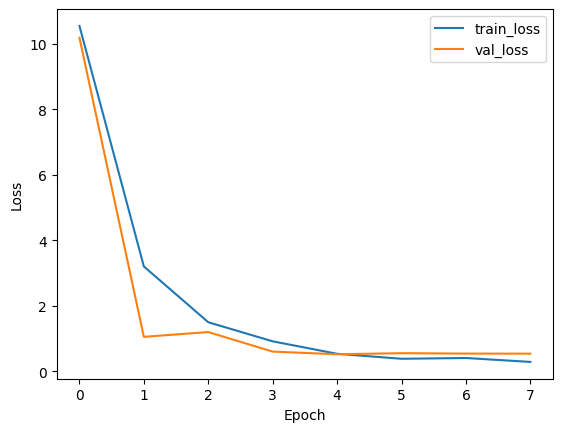

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.7772 - auc_6: 0.8364 - auc_7: 0.7748 - false_negatives_3: 14.0000 - false_positives_3: 20.4444 - loss: 0.5569 - precision_3: 0.7187 - recall_3: 0.8147 - true_negatives_3: 62.0000 - true_positives_3: 56.4444
Test Accuracy: 77.08%
Precision: 0.76
Recall: 0.79
AUC-ROC: 0.84
AUC-PR: 0.84
TN: 92.0, FP: 30.0, FN: 25.0, TP: 93.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 698ms/step
Confusion Matrix:
[[92 30]
 [25 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       122
           1       0.76      0.79      0.77       118

    accuracy                           0.77       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.77      0.77      0.77       240

AUC Score: 0.77
Precision: 0.76
Recall: 0.79
F1 Score: 0.77
PR AUC: 0.82
Cohen's Kappa Coefficient: 0.54
Matthews Correlation Coefficient (MCC): 0.54
Balanced Accuracy: 0.77
Time taken: 268.73 seco

 batch_normalization_62 (Ba  (None, 17, 17, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 17, 17, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 8, 8, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 8, 8, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 8, 8, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 8, 8, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 8, 8, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

Epoch 8/50
15/15 [==============================] - 14s 953ms/step - loss: 0.3716 - accuracy: 0.9146 - precision: 0.9136 - recall: 0.9174 - auc: 0.9576 - auc_1: 0.9508 - true_negatives: 217.0000 - false_positives: 21.0000 - false_negatives: 20.0000 - true_positives: 222.0000 - val_loss: 0.5008 - val_accuracy: 0.8667 - val_precision: 0.8387 - val_recall: 0.8966 - val_auc: 0.9373 - val_auc_1: 0.9097 - val_true_negatives: 52.0000 - val_false_positives: 10.0000 - val_false_negatives: 6.0000 - val_true_positives: 52.0000
Epoch 9/50
15/15 [==============================] - 14s 945ms/step - loss: 0.4031 - accuracy: 0.9021 - precision: 0.8916 - recall: 0.9174 - auc: 0.9546 - auc_1: 0.9447 - true_negatives: 211.0000 - false_positives: 27.0000 - false_negatives: 20.0000 - true_positives: 222.0000 - val_loss: 0.6639 - val_accuracy: 0.8583 - val_precision: 0.8154 - val_recall: 0.9138 - val_auc: 0.9202 - val_auc_1: 0.8772 - val_true_negatives: 50.0000 - val_false_positives: 12.0000 - val_false_nega

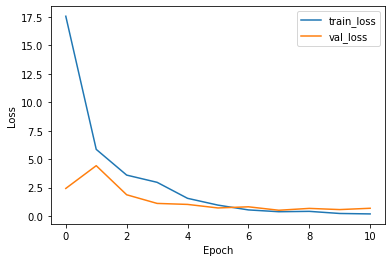

4/4 [==============================] - 2s 454ms/step - loss: 0.5008 - accuracy: 0.8667 - precision: 0.8387 - recall: 0.8966 - auc: 0.9373 - auc_1: 0.9097 - true_negatives: 52.0000 - false_positives: 10.0000 - false_negatives: 6.0000 - true_positives: 52.0000
Test Accuracy: 86.67%
Precision: 0.84
Recall: 0.90
AUC-ROC: 0.94
AUC-PR: 0.91
TN: 52.0, FP: 10.0, FN: 6.0, TP: 52.0
4/4 [==============================] - 2s 453ms/step
Confusion Matrix:
[[52 10]
 [ 6 52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        62
           1       0.84      0.90      0.87        58

    accuracy                           0.87       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.87      0.87      0.87       120

AUC Score: 0.87
Precision: 0.84
Recall: 0.90
F1 Score: 0.87
PR AUC: 0.89
Cohen's Kappa Coefficient: 0.73
Matthews Correlation Coefficient (MCC): 0.74
Balanced Accuracy: 0.87
Time taken:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of InceptionV3
x = Flatten()(base_model.output)

# Add Dropout layer
x = Dropout(0.5)(x)

# Add Dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)

# Add final Dense layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_376 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_376[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_376      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_377 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_376[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_377[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_377      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_378 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_377[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_378[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_378      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 73, 73,    │          0 │ activation_378[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_379 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_16… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_379[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_379      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_380 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_379[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_380[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_380      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 89,043,745 (339.67 MB)

 Trainable params: 67,240,961 (256.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5542 - auc_8: 0.5751 - auc_9: 0.5411 - false_negatives_4: 112.0323 - false_positives_4: 112.1936 - loss: 12.1559 - precision_4: 0.5348 - recall_4: 0.5420 - true_negatives_4: 148.6129 - true_positives_4: 138.1290 - val_accuracy: 0.6417 - val_auc_8: 0.6942 - val_auc_9: 0.6166 - val_false_negatives_4: 3.0000 - val_false_positives_4: 83.0000 - val_loss: 4.6791 - val_precision_4: 0.5808 - val_recall_4: 0.9746 - val_true_negatives_4: 39.0000 - val_true_positives_4: 115.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6565 - auc_8: 0.6875 - auc_9: 0.6469 - false_negatives_4: 77.6129 - false_positives_4: 88.4194 - loss: 4.3128 - precision_4: 0.6429 - recall_4: 0.7042 - true_negatives_4: 168.0000 - true_positives_4: 176.9355 - val_accuracy: 0.6458 - val_auc_8: 0.7593 - val_auc_9: 0.6790 - val_false_negatives_4: 3.0000 - val_false_positives_4: 82.0000 - val_loss: 2.0307 - val_precision_4: 0.5838 - val_recall_4:

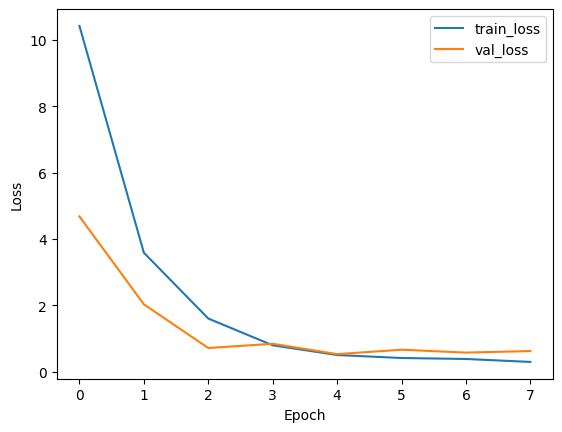

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.7326 - auc_8: 0.8350 - auc_9: 0.7858 - false_negatives_4: 15.3333 - false_positives_4: 23.2222 - loss: 0.5618 - precision_4: 0.6710 - recall_4: 0.7695 - true_negatives_4: 59.2222 - true_positives_4: 55.1111
Test Accuracy: 76.67%
Precision: 0.75
Recall: 0.79
AUC-ROC: 0.85
AUC-PR: 0.84
TN: 91.0, FP: 31.0, FN: 25.0, TP: 93.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 653ms/step
Confusion Matrix:
[[91 31]
 [25 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       122
           1       0.75      0.79      0.77       118

    accuracy                           0.77       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.77      0.77      0.77       240

AUC Score: 0.77
Precision: 0.75
Recall: 0.79
F1 Score: 0.77
PR AUC: 0.82
Cohen's Kappa Coefficient: 0.53
Matthews Correlation Coefficient (MCC): 0.53
Balanced Accuracy: 0.77
Time taken: 269.14 seco

 batch_normalization_62 (Ba  (None, 17, 17, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 17, 17, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 17, 17, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 8, 8, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 8, 8, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 8, 8, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 8, 8, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 8, 8, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 8, 8, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

Epoch 8/150
15/15 [==============================] - 14s 939ms/step - loss: 0.5665 - accuracy: 0.9062 - precision: 0.9227 - recall: 0.8884 - auc: 0.9382 - auc_1: 0.9227 - true_negatives: 220.0000 - false_positives: 18.0000 - false_negatives: 27.0000 - true_positives: 215.0000 - val_loss: 0.6464 - val_accuracy: 0.8500 - val_precision: 0.8226 - val_recall: 0.8793 - val_auc: 0.9095 - val_auc_1: 0.8946 - val_true_negatives: 51.0000 - val_false_positives: 11.0000 - val_false_negatives: 7.0000 - val_true_positives: 51.0000
Epoch 9/150
15/15 [==============================] - 14s 924ms/step - loss: 0.5636 - accuracy: 0.9000 - precision: 0.8975 - recall: 0.9050 - auc: 0.9368 - auc_1: 0.9249 - true_negatives: 213.0000 - false_positives: 25.0000 - false_negatives: 23.0000 - true_positives: 219.0000 - val_loss: 0.6670 - val_accuracy: 0.8333 - val_precision: 0.7639 - val_recall: 0.9483 - val_auc: 0.9050 - val_auc_1: 0.8701 - val_true_negatives: 45.0000 - val_false_positives: 17.0000 - val_false_ne

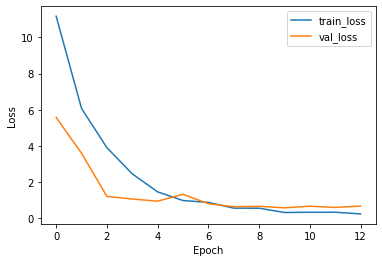

4/4 [==============================] - 2s 454ms/step - loss: 0.5844 - accuracy: 0.8167 - precision: 0.8600 - recall: 0.7414 - auc: 0.8992 - auc_1: 0.9173 - true_negatives: 55.0000 - false_positives: 7.0000 - false_negatives: 15.0000 - true_positives: 43.0000
Test Accuracy: 81.67%
Precision: 0.86
Recall: 0.74
AUC-ROC: 0.90
AUC-PR: 0.92
TN: 55.0, FP: 7.0, FN: 15.0, TP: 43.0
4/4 [==============================] - 2s 457ms/step
Confusion Matrix:
[[55  7]
 [15 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        62
           1       0.86      0.74      0.80        58

    accuracy                           0.82       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.82      0.82      0.82       120

AUC Score: 0.81
Precision: 0.86
Recall: 0.74
F1 Score: 0.80
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.63
Matthews Correlation Coefficient (MCC): 0.64
Balanced Accuracy: 0.81
Time taken:

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import InceptionV3

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 100, 3)  # Example training data with shape (100, 100, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 100, 3)  # Example testing data with shape (20, 100, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model without top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(299, 299, 3))
inception_output = inception_base(input_tensor)
flatten = Flatten()(inception_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import InceptionV3

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Placeholder data - replace with your actual training and testing data
X_train = np.random.rand(100, 100, 3)  # Example training data with shape (100, 100, 3)
y_train = np.random.randint(0, 2, size=100)  # Example training labels (binary)
X_test = np.random.rand(20, 100, 3)  # Example testing data with shape (20, 100, 3)
y_test = np.random.randint(0, 2, size=20)  # Example testing labels (binary)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model without top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(299, 299, 3))
inception_output = inception_base(input_tensor)
flatten = Flatten()(inception_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of InceptionV3
x = Flatten()(base_model.output)

# Add Dropout layer
x = Dropout(0.5)(x)

# Add Dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)

# Add final Dense layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_470 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_470[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_470      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_471 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_470[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_471[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_471      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_472 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_471[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_472[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_472      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 73, 73,    │          0 │ activation_472[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_473 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_20… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_473[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_473      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_474 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_473[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_474[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_474      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 89,043,745 (339.67 MB)

 Trainable params: 67,240,961 (256.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5435 - auc_10: 0.5360 - auc_11: 0.5119 - false_negatives_5: 118.5161 - false_positives_5: 110.0000 - loss: 12.7927 - precision_5: 0.5146 - recall_5: 0.4880 - true_negatives_5: 147.5161 - true_positives_5: 134.9355 - val_accuracy: 0.6625 - val_auc_10: 0.7400 - val_auc_11: 0.7366 - val_false_negatives_5: 48.0000 - val_false_positives_5: 33.0000 - val_loss: 1.6503 - val_precision_5: 0.6796 - val_recall_5: 0.5932 - val_true_negatives_5: 89.0000 - val_true_positives_5: 70.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6286 - auc_10: 0.6450 - auc_11: 0.6173 - false_negatives_5: 92.1936 - false_positives_5: 92.3871 - loss: 4.3313 - precision_5: 0.6273 - recall_5: 0.6227 - true_negatives_5: 161.7097 - true_positives_5: 164.6774 - val_accuracy: 0.6708 - val_auc_10: 0.7390 - val_auc_11: 0.7394 - val_false_negatives_5: 55.0000 - val_false_positives_5: 24.0000 - val_loss: 1.8228 - val_precision_5: 0.7241 - val_

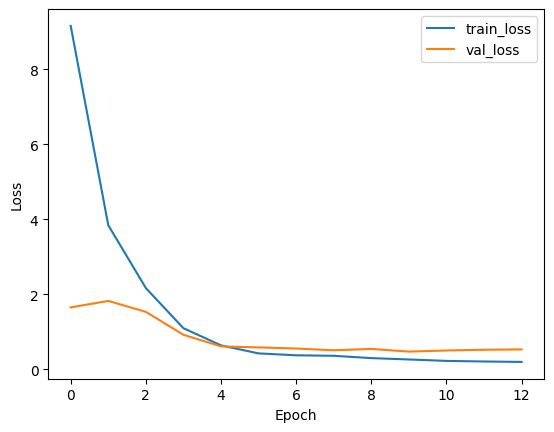

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - accuracy: 0.7488 - auc_10: 0.8531 - auc_11: 0.8320 - false_negatives_5: 17.0000 - false_positives_5: 22.0000 - loss: 0.4816 - precision_5: 0.6941 - recall_5: 0.7702 - true_negatives_5: 60.4444 - true_positives_5: 53.4444
Test Accuracy: 75.42%
Precision: 0.75
Recall: 0.75
AUC-ROC: 0.86
AUC-PR: 0.87
TN: 92.0, FP: 30.0, FN: 29.0, TP: 89.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 652ms/step
Confusion Matrix:
[[92 30]
 [29 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       122
           1       0.75      0.75      0.75       118

    accuracy                           0.75       240
   macro avg       0.75      0.75      0.75       240
weighted avg       0.75      0.75      0.75       240

AUC Score: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
PR AUC: 0.81
Cohen's Kappa Coefficient: 0.51
Matthews Correlation Coefficient (MCC): 0.51
Balanced Accuracy: 0.75
Time taken: 427.30 se

                                                                                                  
 batch_normalization_156 (B  (None, 17, 17, 192)          576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 17, 17, 192)          576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 8, 8, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, 8, 8, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 8, 8, 320)            960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 8, 8, 192)            576       ['conv2d_169[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, 8, 8, 192)            576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

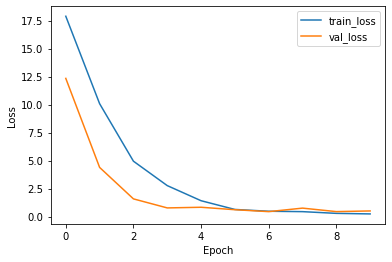

4/4 [==============================] - 2s 455ms/step - loss: 0.4394 - accuracy: 0.8167 - precision_1: 0.8462 - recall_1: 0.7586 - auc_2: 0.9120 - auc_3: 0.9208 - true_negatives_1: 54.0000 - false_positives_1: 8.0000 - false_negatives_1: 14.0000 - true_positives_1: 44.0000
Test Accuracy: 81.67%
Precision: 0.85
Recall: 0.76
AUC-ROC: 0.91
AUC-PR: 0.92
TN: 54.0, FP: 8.0, FN: 14.0, TP: 44.0
4/4 [==============================] - 2s 453ms/step
Confusion Matrix:
[[54  8]
 [14 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        62
           1       0.85      0.76      0.80        58

    accuracy                           0.82       120
   macro avg       0.82      0.81      0.82       120
weighted avg       0.82      0.82      0.82       120

AUC Score: 0.81
Precision: 0.85
Recall: 0.76
F1 Score: 0.80
PR AUC: 0.86
Cohen's Kappa Coefficient: 0.63
Matthews Correlation Coefficient (MCC): 0.63
Balanced Accuracy: 0.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of InceptionV3
x = Flatten()(base_model.output)

# Add Dropout layer
x = Dropout(0.5)(x)

# Add Dense layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)

# Add final Dense layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base InceptionV3 model with the custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Calculate Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# Calculate F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# GlobalAveragePooling2D

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 782ms/step - accuracy: 0.5679 - auc_12: 0.5801 - auc_13: 0.5721 - loss: 0.9568 - precision_6: 0.5694 - recall_6: 0.6026 - val_accuracy: 0.6875 - val_auc_12: 0.7713 - val_auc_13: 0.7679 - val_loss: 0.5947 - val_precision_6: 0.6483 - val_recall_6: 0.7966
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 744ms/step - accuracy: 0.6246 - auc_12: 0.6828 - auc_13: 0.6870 - loss: 0.6828 - precision_6: 0.6186 - recall_6: 0.6097 - val_accuracy: 0.7292 - val_auc_12: 0.8261 - val_auc_13: 0.8148 - val_loss: 0.5518 - val_precision_6: 0.8272 - val_recall_6: 0.5678
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 742ms/step - accuracy: 0.7200 - auc_12: 0.8074 - auc_13: 0.8108 - loss: 0.5358 - precision_6: 0.7218 - recall_6: 0.7239 - val_accuracy: 0.7167 - val_auc_12: 0.8401 - val_auc_13: 0.8316 - val_loss: 0.5627 - val_precision_6: 0.9032 - val_recall_6: 0.4746
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 742ms/step - accuracy: 0.7372 - auc_12: 0.8314 - auc_13: 0.8323 - loss: 0

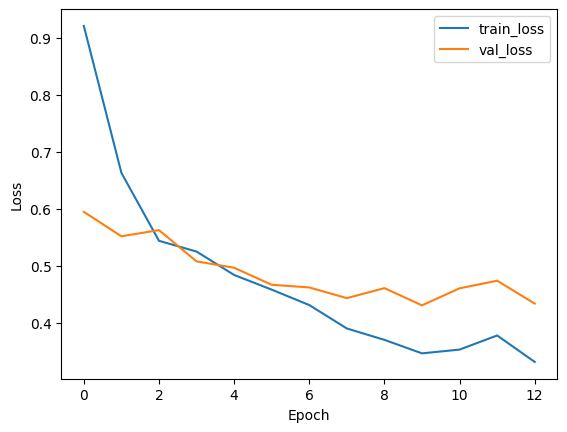

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 639ms/step
Accuracy: 0.80
Precision: 0.79
Recall (Sensitivity): 0.82
F1 Score: 0.80
Specificity: 0.79
Confusion Matrix:
[[96 26]
 [21 97]]
Area Under the ROC Curve (AUC-ROC): 0.80


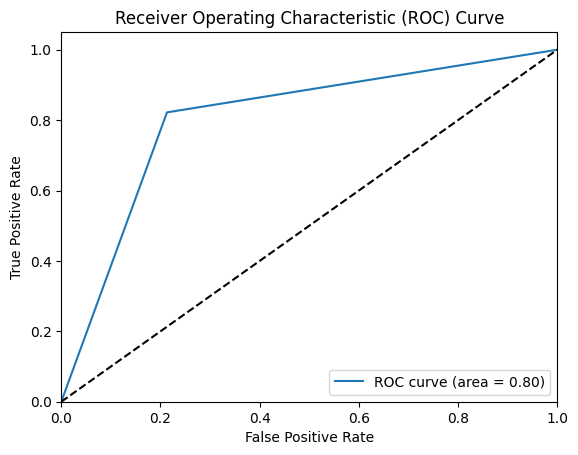

Precision-Recall Curve (AUC-PR): 0.85


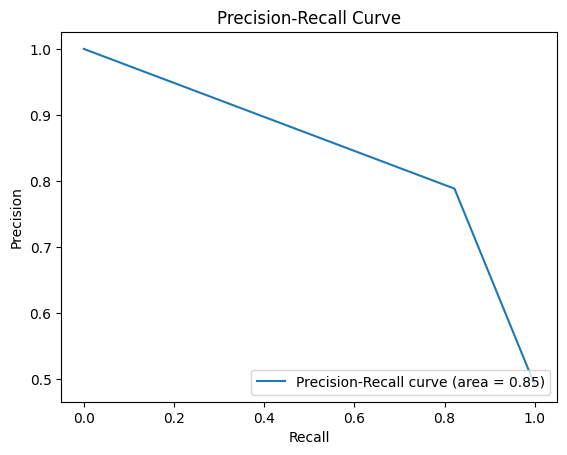

Cohen's Kappa Coefficient: 0.61
Matthews Correlation Coefficient (MCC): 0.61
Balanced Accuracy: 0.80
Time taken: 299.72 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      ])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 772ms/step - accuracy: 0.5444 - auc_14: 0.5791 - auc_15: 0.5632 - loss: 0.9103 - precision_7: 0.5327 - recall_7: 0.5180 - val_accuracy: 0.7042 - val_auc_14: 0.7863 - val_auc_15: 0.7659 - val_loss: 0.5680 - val_precision_7: 0.6691 - val_recall_7: 0.7881
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 740ms/step - accuracy: 0.6488 - auc_14: 0.7218 - auc_15: 0.7373 - loss: 0.6516 - precision_7: 0.6545 - recall_7: 0.6266 - val_accuracy: 0.7125 - val_auc_14: 0.8262 - val_auc_15: 0.8104 - val_loss: 0.5492 - val_precision_7: 0.8101 - val_recall_7: 0.5424
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 740ms/step - accuracy: 0.7183 - auc_14: 0.7877 - auc_15: 0.8013 - loss: 0.5635 - precision_7: 0.7259 - recall_7: 0.7359 - val_accuracy: 0.7458 - val_auc_14: 0.8420 - val_auc_15: 0.8300 - val_loss: 0.5174 - val_precision_7: 0.8132 - val_recall_7: 0.6271
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 738ms/step - accuracy: 0.7517 - auc_14: 0.8269 - auc_15: 0.8441 - los

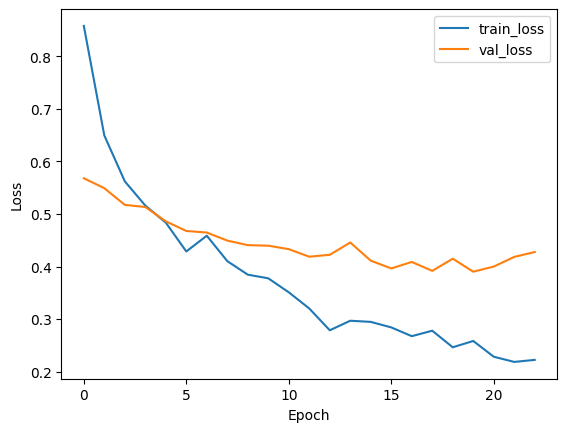

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 641ms/step
Accuracy: 0.83
Precision: 0.87
Recall (Sensitivity): 0.76
F1 Score: 0.81
Specificity: 0.89
Confusion Matrix:
[[109  13]
 [ 28  90]]
Area Under the ROC Curve (AUC-ROC): 0.83


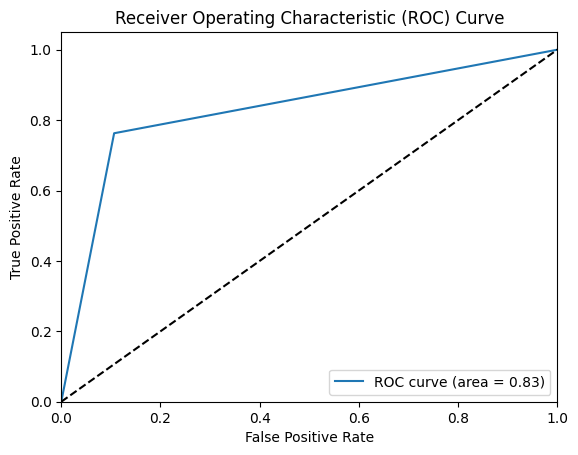

Precision-Recall Curve (AUC-PR): 0.88


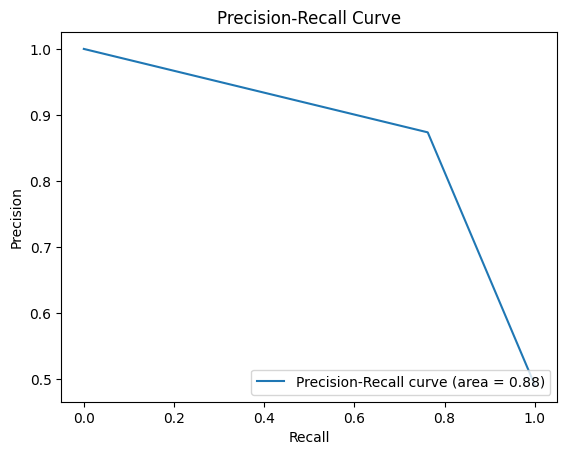

Cohen's Kappa Coefficient: 0.66
Matthews Correlation Coefficient (MCC): 0.66
Balanced Accuracy: 0.83
Time taken: 521.35 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      ])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 777ms/step - accuracy: 0.5899 - auc_16: 0.6238 - auc_17: 0.6419 - loss: 0.8765 - precision_8: 0.6094 - recall_8: 0.6390 - val_accuracy: 0.7083 - val_auc_16: 0.7794 - val_auc_17: 0.7628 - val_loss: 0.5788 - val_precision_8: 0.7727 - val_recall_8: 0.5763
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 741ms/step - accuracy: 0.5736 - auc_16: 0.6483 - auc_17: 0.7006 - loss: 0.7496 - precision_8: 0.5961 - recall_8: 0.6362 - val_accuracy: 0.7125 - val_auc_16: 0.7978 - val_auc_17: 0.7800 - val_loss: 0.5655 - val_precision_8: 0.7952 - val_recall_8: 0.5593
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 740ms/step - accuracy: 0.7037 - auc_16: 0.7779 - auc_17: 0.7914 - loss: 0.5753 - precision_8: 0.7138 - recall_8: 0.6701 - val_accuracy: 0.7667 - val_auc_16: 0.8298 - val_auc_17: 0.8120 - val_loss: 0.5124 - val_precision_8: 0.7768 - val_recall_8: 0.7373
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 740ms/step - accuracy: 0.7369 - auc_16: 0.8335 - auc_17: 0.8504 - los

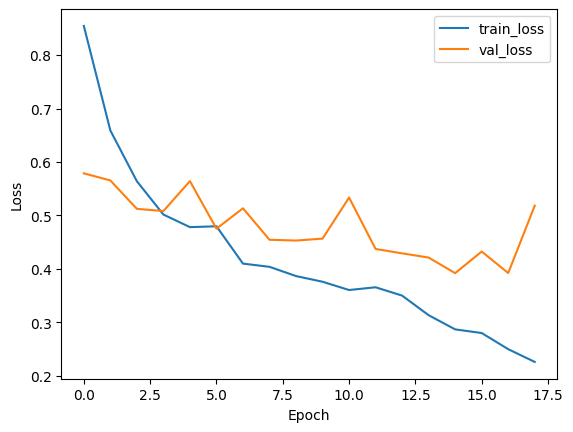

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 639ms/step
Accuracy: 0.84
Precision: 0.84
Recall (Sensitivity): 0.83
F1 Score: 0.84
Specificity: 0.85
Confusion Matrix:
[[104  18]
 [ 20  98]]
Area Under the ROC Curve (AUC-ROC): 0.84


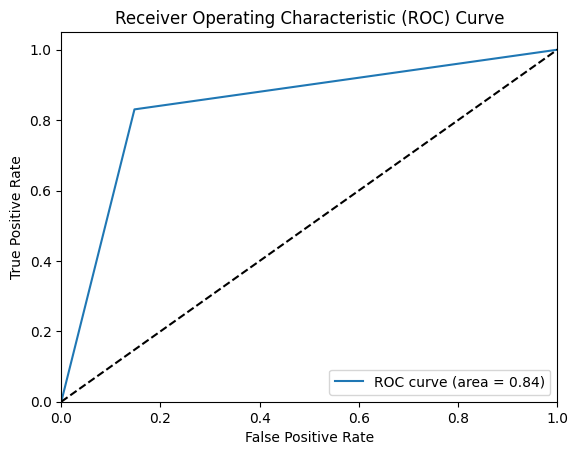

Precision-Recall Curve (AUC-PR): 0.88


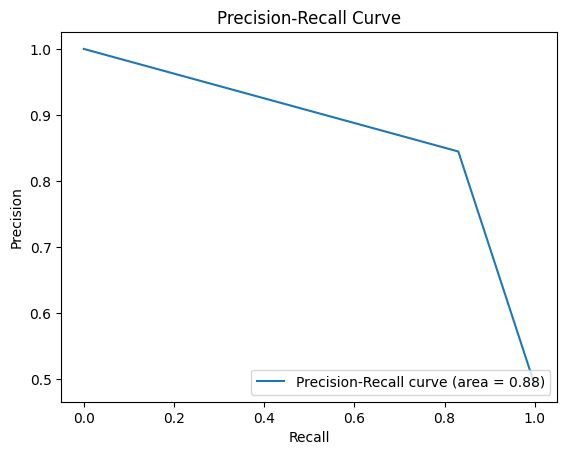

Cohen's Kappa Coefficient: 0.68
Matthews Correlation Coefficient (MCC): 0.68
Balanced Accuracy: 0.84
Time taken: 409.68 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      ])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_predictions = model.predict(X_test_resized) > 0.5

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, test_predictions)
print(f'Recall (Sensitivity): {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'Area Under the ROC Curve (AUC-ROC): {roc_auc:.2f}')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'Precision-Recall Curve (AUC-PR): {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Conv2D + GlobalAveragePooling2D +Dropout+ Dense Layers

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 777ms/step - accuracy: 0.5491 - auc_18: 0.5794 - auc_19: 0.5710 - false_negatives_6: 112.4194 - false_positives_6: 104.4839 - loss: 0.9370 - precision_9: 0.5394 - recall_9: 0.5191 - true_negatives_6: 148.9032 - true_positives_6: 145.1613 - val_accuracy: 0.6208 - val_auc_18: 0.7714 - val_auc_19: 0.7547 - val_false_negatives_6: 13.0000 - val_false_positives_6: 78.0000 - val_loss: 0.6287 - val_precision_9: 0.5738 - val_recall_9: 0.8898 - val_true_negatives_6: 44.0000 - val_true_positives_6: 105.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 743ms/step - accuracy: 0.6558 - auc_18: 0.7225 - auc_19: 0.7207 - false_negatives_6: 72.9677 - false_positives_6: 94.2581 - loss: 0.6436 - precision_9: 0.6480 - recall_9: 0.7242 - true_negatives_6: 158.8065 - true_positives_6: 184.9355 - val_accuracy: 0.7292 - val_auc_18: 0.8103 - val_auc_19: 0.7981 - val_false_negatives_6: 29.0000 - val_false_positives_6: 36.0000 - val_loss: 0.5367 - val_precision_9: 0.7120 - 

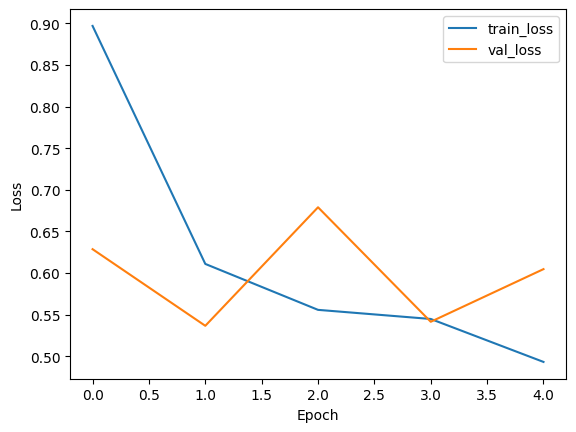

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step - accuracy: 0.7011 - auc_18: 0.7972 - auc_19: 0.7623 - false_negatives_6: 17.4444 - false_positives_6: 27.0000 - loss: 0.5560 - precision_9: 0.6370 - recall_9: 0.7579 - true_negatives_6: 55.4444 - true_positives_6: 53.0000
Test Accuracy: 72.92%
Precision: 0.71
Recall: 0.75
AUC-ROC: 0.81
AUC-PR: 0.80
TP: 89.0, FP: 36.0, TN: 86.0, FN: 29.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 642ms/step
Confusion Matrix:
[[86 36]
 [29 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       122
           1       0.71      0.75      0.73       118

    accuracy                           0.73       240
   macro avg       0.73      0.73      0.73       240
weighted avg       0.73      0.73      0.73       240

AUC Score: 0.73
Precision: 0.71
Recall: 0.75
F1 Score: 0.73
PR AUC: 0.79
Cohen's Kappa Coefficient: 0.46
Matthews Correlation Coefficient (MCC): 0.46
Balanced Accuracy: 0.73
Time taken: 126.70 se

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 780ms/step - accuracy: 0.5243 - auc_20: 0.5204 - auc_21: 0.5279 - false_negatives_7: 116.2258 - false_positives_7: 119.7097 - loss: 1.0305 - precision_10: 0.5366 - recall_10: 0.5555 - true_negatives_7: 131.1613 - true_positives_7: 143.8710 - val_accuracy: 0.6417 - val_auc_20: 0.7304 - val_auc_21: 0.7246 - val_false_negatives_7: 44.0000 - val_false_positives_7: 42.0000 - val_loss: 0.6067 - val_precision_10: 0.6379 - val_recall_10: 0.6271 - val_true_negatives_7: 80.0000 - val_true_positives_7: 74.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 743ms/step - accuracy: 0.6324 - auc_20: 0.6908 - auc_21: 0.6640 - false_negatives_7: 98.6452 - false_positives_7: 82.6774 - loss: 0.6817 - precision_10: 0.6249 - recall_10: 0.5788 - true_negatives_7: 180.2258 - true_positives_7: 149.4194 - val_accuracy: 0.7000 - val_auc_20: 0.7712 - val_auc_21: 0.7663 - val_false_negatives_7: 23.0000 - val_false_positives_7: 49.0000 - val_loss: 0.5851 - val_precision_10: 0

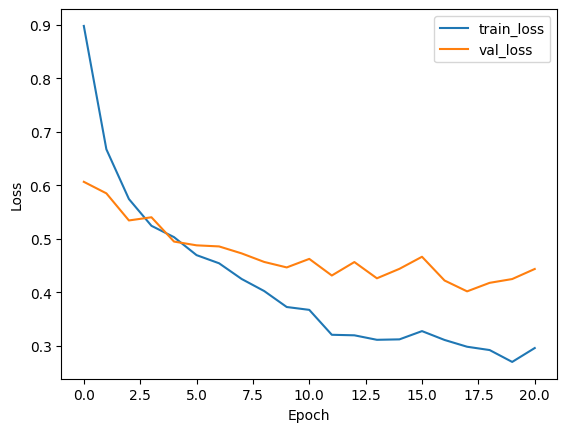

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.8360 - auc_20: 0.8938 - auc_21: 0.8831 - false_negatives_7: 11.4444 - false_positives_7: 14.0000 - loss: 0.4191 - precision_10: 0.7946 - recall_10: 0.8499 - true_negatives_7: 68.4444 - true_positives_7: 59.0000
Test Accuracy: 83.75%
Precision: 0.84
Recall: 0.83
AUC-ROC: 0.90
AUC-PR: 0.90
TP: 98.0, FP: 19.0, TN: 103.0, FN: 20.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 728ms/step
Confusion Matrix:
[[103  19]
 [ 20  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       122
           1       0.84      0.83      0.83       118

    accuracy                           0.84       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.84      0.84      0.84       240

AUC Score: 0.84
Precision: 0.84
Recall: 0.83
F1 Score: 0.83
PR AUC: 0.88
Cohen's Kappa Coefficient: 0.67
Matthews Correlation Coefficient (MCC): 0.67
Balanced Accuracy: 0.84
Time taken: 48

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,983,457 (87.67 MB)

 Trainable params: 1,180,673 (4.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 780ms/step - accuracy: 0.5423 - auc_22: 0.5872 - auc_23: 0.5677 - false_negatives_8: 117.9032 - false_positives_8: 112.1613 - loss: 0.9797 - precision_11: 0.5370 - recall_11: 0.5097 - true_negatives_8: 142.0000 - true_positives_8: 138.9032 - val_accuracy: 0.6417 - val_auc_22: 0.7901 - val_auc_23: 0.7691 - val_false_negatives_8: 79.0000 - val_false_positives_8: 7.0000 - val_loss: 0.6193 - val_precision_11: 0.8478 - val_recall_11: 0.3305 - val_true_negatives_8: 115.0000 - val_true_positives_8: 39.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 742ms/step - accuracy: 0.6684 - auc_22: 0.7279 - auc_23: 0.7367 - false_negatives_8: 94.5161 - false_positives_8: 76.7419 - loss: 0.6566 - precision_11: 0.7034 - recall_11: 0.6130 - true_negatives_8: 173.6129 - true_positives_8: 166.0968 - val_accuracy: 0.7375 - val_auc_22: 0.7956 - val_auc_23: 0.7775 - val_false_negatives_8: 35.0000 - val_false_positives_8: 28.0000 - val_loss: 0.5532 - val_precision_11: 0

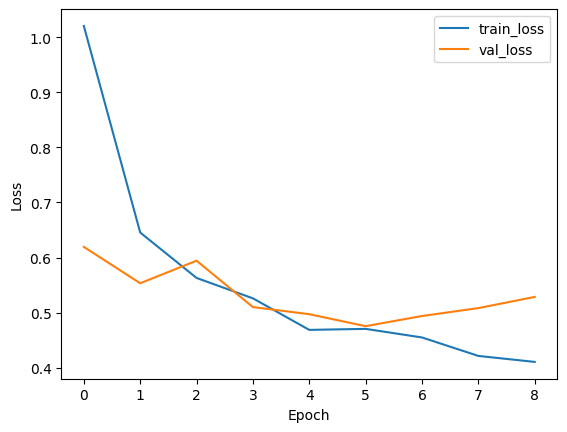

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 544ms/step - accuracy: 0.7853 - auc_22: 0.8460 - auc_23: 0.8072 - false_negatives_8: 15.4444 - false_positives_8: 17.1111 - loss: 0.4917 - precision_11: 0.7425 - recall_11: 0.7891 - true_negatives_8: 65.3333 - true_positives_8: 55.0000
Test Accuracy: 80.00%
Precision: 0.81
Recall: 0.78
AUC-ROC: 0.86
AUC-PR: 0.84
TP: 92.0, FP: 22.0, TN: 100.0, FN: 26.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 640ms/step
Confusion Matrix:
[[100  22]
 [ 26  92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       122
           1       0.81      0.78      0.79       118

    accuracy                           0.80       240
   macro avg       0.80      0.80      0.80       240
weighted avg       0.80      0.80      0.80       240

AUC Score: 0.80
Precision: 0.81
Recall: 0.78
F1 Score: 0.79
PR AUC: 0.85
Cohen's Kappa Coefficient: 0.60
Matthews Correlation Coefficient (MCC): 0.60
Balanced Accuracy: 0.80
Time taken: 21

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Add custom Dense layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Precision for class 1 (Positive)
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# Recall for class 1 (Positive)
recall = recall_score(y_test, test_predictions)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Precision-Recall curve and PR AUC
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
print(f'PR AUC: {pr_auc:.2f}')

# Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Balanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# LSTM + Dense Layers

2024-11-16 13:57:50.721172: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 13:57:50.721835: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 13:57:50.724862: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 13:57:50.731732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731745670.741179    6215 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731745670.74

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │    67,174,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,986,017 (339.45 MB)

 Trainable params: 67,183,233 (256.28 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5624 - auc: 0.5784 - auc_1: 0.5603 - false_negatives: 135.2258 - false_positives: 92.0968 - loss: 0.6891 - precision: 0.5803 - recall: 0.3852 - true_negatives: 165.3548 - true_positives: 118.2903 - val_accuracy: 0.5917 - val_auc: 0.6506 - val_auc_1: 0.6285 - val_false_negatives: 80.0000 - val_false_positives: 18.0000 - val_loss: 0.6747 - val_precision: 0.6786 - val_recall: 0.3220 - val_true_negatives: 104.0000 - val_true_positives: 38.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6500 - auc: 0.7169 - auc_1: 0.7103 - false_negatives: 109.2581 - false_positives: 66.1613 - loss: 0.6509 - precision: 0.7037 - recall: 0.5208 - true_negatives: 189.7097 - true_positives: 145.8387 - val_accuracy: 0.6000 - val_auc: 0.6626 - val_auc_1: 0.6834 - val_false_negatives: 64.0000 - val_false_positives: 32.0000 - val_loss: 0.6582 - val_precision: 0.6279 - val_recall: 0.4576 - val_true_negatives: 90.0000 - val_true_posi

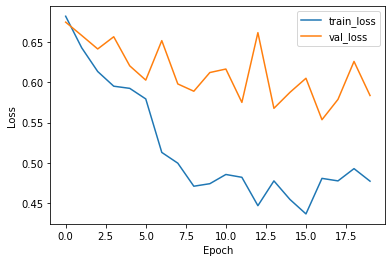

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 566ms/step - accuracy: 0.7705 - auc: 0.7601 - auc_1: 0.7339 - false_negatives: 24.0000 - false_positives: 12.1111 - loss: 0.5470 - precision: 0.7912 - recall: 0.6519 - true_negatives: 70.3333 - true_positives: 46.4444
Test Accuracy: 75.42%
Precision: 0.80
Recall: 0.66
AUC-ROC: 0.77
AUC-PR: 0.77
TP: 78.0, FP: 19.0, TN: 103.0, FN: 40.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 677ms/step
Confusion Matrix:
[[103  19]
 [ 40  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       122
           1       0.80      0.66      0.73       118

    accuracy                           0.75       240
   macro avg       0.76      0.75      0.75       240
weighted avg       0.76      0.75      0.75       240

AUC Score: 0.75

Precision: 0.8041237113402062
Recall: 0.6610169491525424
F1 Score: 0.7255813953488373
Cohen's Kappa Coefficient: 0.51
Matthews Correlation Coefficient (MCC): 0.51
Balanced Accuracy: 0.75
Ti

In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import time
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define constants
data_path = "/home/l2-52/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a given folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = all_images[all_labels == 0][:600]
oscc_images = all_images[all_labels == 1][:600]
normal_labels = all_labels[all_labels == 0][:600]
oscc_labels = all_labels[all_labels == 1][:600]

balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for LSTM
reshape = Reshape((1, -1))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │    67,174,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,986,017 (339.45 MB)

 Trainable params: 67,183,233 (256.28 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5519 - auc_2: 0.5510 - auc_3: 0.5475 - false_negatives_1: 95.1936 - false_positives_1: 125.7097 - loss: 0.6965 - precision_1: 0.5598 - recall_1: 0.6144 - true_negatives_1: 125.7742 - true_positives_1: 164.2903 - val_accuracy: 0.6250 - val_auc_2: 0.6686 - val_auc_3: 0.6136 - val_false_negatives_1: 59.0000 - val_false_positives_1: 31.0000 - val_loss: 0.6667 - val_precision_1: 0.6556 - val_recall_1: 0.5000 - val_true_negatives_1: 91.0000 - val_true_positives_1: 59.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6501 - auc_2: 0.6959 - auc_3: 0.6676 - false_negatives_1: 110.1936 - false_positives_1: 63.8387 - loss: 0.6510 - precision_1: 0.6967 - recall_1: 0.5267 - true_negatives_1: 193.9032 - true_positives_1: 143.0323 - val_accuracy: 0.5833 - val_auc_2: 0.6727 - val_auc_3: 0.6611 - val_false_negatives_1: 9.0000 - val_false_positives_1: 91.0000 - val_loss: 0.6659 - val_precision_1: 0.5450 - val_recall_1: 

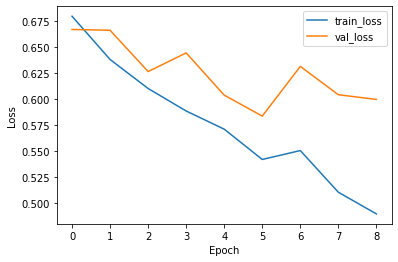

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - accuracy: 0.7282 - auc_2: 0.7809 - auc_3: 0.6668 - false_negatives_1: 13.1111 - false_positives_1: 29.5556 - loss: 0.5783 - precision_1: 0.6564 - recall_1: 0.8078 - true_negatives_1: 52.8889 - true_positives_1: 57.3333
Test Accuracy: 72.08%
Precision: 0.68
Recall: 0.82
AUC-ROC: 0.78
AUC-PR: 0.73
TP: 97.0, FP: 46.0, TN: 76.0, FN: 21.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 670ms/step
Confusion Matrix:
[[76 46]
 [21 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       122
           1       0.68      0.82      0.74       118

    accuracy                           0.72       240
   macro avg       0.73      0.72      0.72       240
weighted avg       0.73      0.72      0.72       240

AUC Score: 0.72

Precision: 0.6783216783216783
Recall: 0.8220338983050848
F1 Score: 0.7432950191570882
Cohen's Kappa Coefficient: 0.44
Matthews Correlation Coefficient (MCC): 0.45
Balanced Accuracy

In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import time
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define constants
data_path = "/home/l2-52/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a given folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = all_images[all_labels == 0][:600]
oscc_images = all_images[all_labels == 1][:600]
normal_labels = all_labels[all_labels == 0][:600]
oscc_labels = all_labels[all_labels == 1][:600]

balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for LSTM
reshape = Reshape((1, -1))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │    67,174,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,986,017 (339.45 MB)

 Trainable params: 67,183,233 (256.28 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6127 - auc_4: 0.6688 - auc_5: 0.6203 - false_negatives_2: 117.8710 - false_positives_2: 74.3226 - loss: 0.6445 - precision_2: 0.6035 - recall_2: 0.4877 - true_negatives_2: 190.3871 - true_positives_2: 128.3871 - val_accuracy: 0.6333 - val_auc_4: 0.6972 - val_auc_5: 0.6818 - val_false_negatives_2: 37.0000 - val_false_positives_2: 51.0000 - val_loss: 0.6503 - val_precision_2: 0.6136 - val_recall_2: 0.6864 - val_true_negatives_2: 71.0000 - val_true_positives_2: 81.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6906 - auc_4: 0.7608 - auc_5: 0.7800 - false_negatives_2: 79.1936 - false_positives_2: 82.4839 - loss: 0.6238 - precision_2: 0.7048 - recall_2: 0.6803 - true_negatives_2: 171.9677 - true_positives_2: 177.3226 - val_accuracy: 0.6000 - val_auc_4: 0.7563 - val_auc_5: 0.7216 - val_false_negatives_2: 7.0000 - val_false_positives_2: 89.0000 - val_loss: 0.6492 - val_precision_2: 0.5550 - val_recall_2: 0

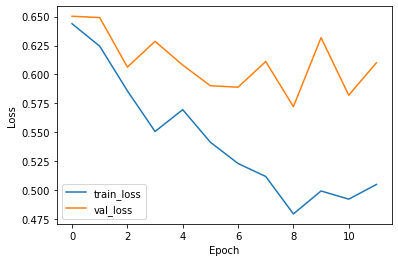

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - accuracy: 0.6996 - auc_4: 0.7756 - auc_5: 0.7555 - false_negatives_2: 25.3333 - false_positives_2: 20.6667 - loss: 0.5573 - precision_2: 0.6715 - recall_2: 0.6158 - true_negatives_2: 61.7778 - true_positives_2: 45.1111
Test Accuracy: 69.17%
Precision: 0.70
Recall: 0.65
AUC-ROC: 0.77
AUC-PR: 0.77
TP: 77.0, FP: 33.0, TN: 89.0, FN: 41.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 675ms/step
Confusion Matrix:
[[89 33]
 [41 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       122
           1       0.70      0.65      0.68       118

    accuracy                           0.69       240
   macro avg       0.69      0.69      0.69       240
weighted avg       0.69      0.69      0.69       240

AUC Score: 0.69

Precision: 0.7
Recall: 0.652542372881356
F1 Score: 0.6754385964912281
Cohen's Kappa Coefficient: 0.38
Matthews Correlation Coefficient (MCC): 0.38
Balanced Accuracy: 0.69
Time take

In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import time
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define constants
data_path = "/home/l2-52/Downloads/ARVIND/oral-combined-dataset"  # Updated path
target_size = (224, 224)  # Define the target size for resizing

# Function to load and preprocess images from a given folder
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
        labels.append(label)
    return images, labels

# Load and preprocess data for NORMAL and OSCC classes
all_images = []
all_labels = []

for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = all_images[all_labels == 0][:600]
oscc_images = all_images[all_labels == 1][:600]
normal_labels = all_labels[all_labels == 0][:600]
oscc_labels = all_labels[all_labels == 1][:600]

balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for LSTM
reshape = Reshape((1, -1))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
start_time = time.time()
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


In [ ]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 21.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


# GRU + Dense Layers

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │    50,381,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,192,673 (275.39 MB)

 Trainable params: 50,389,889 (192.22 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5882 - auc_6: 0.6389 - auc_7: 0.6260 - false_negatives_3: 97.7419 - false_positives_3: 108.2581 - loss: 0.6592 - precision_3: 0.5744 - recall_3: 0.6339 - true_negatives_3: 151.6774 - true_positives_3: 153.2903 - val_accuracy: 0.6208 - val_auc_6: 0.6711 - val_auc_7: 0.6419 - val_false_negatives_3: 64.0000 - val_false_positives_3: 27.0000 - val_loss: 0.6525 - val_precision_3: 0.6667 - val_recall_3: 0.4576 - val_true_negatives_3: 95.0000 - val_true_positives_3: 54.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6494 - auc_6: 0.7294 - auc_7: 0.7267 - false_negatives_3: 92.0000 - false_positives_3: 79.2258 - loss: 0.6265 - precision_3: 0.6715 - recall_3: 0.5813 - true_negatives_3: 177.6774 - true_positives_3: 162.0645 - val_accuracy: 0.6125 - val_auc_6: 0.6892 - val_auc_7: 0.6837 - val_false_negatives_3: 56.0000 - val_false_positives_3: 37.0000 - val_loss: 0.6371 - val_precision_3: 0.6263 - val_recall_3: 0.

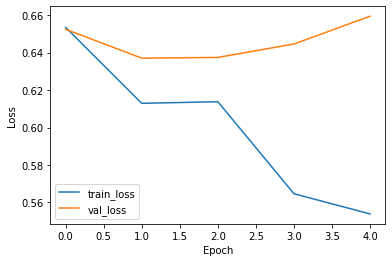

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 560ms/step - accuracy: 0.6105 - auc_6: 0.7016 - auc_7: 0.6439 - false_negatives_3: 36.3333 - false_positives_3: 23.2222 - loss: 0.6276 - precision_3: 0.5682 - recall_3: 0.4422 - true_negatives_3: 59.2222 - true_positives_3: 34.1111
Test Accuracy: 61.25%
Precision: 0.63
Recall: 0.53
AUC-ROC: 0.69
AUC-PR: 0.68
TP: 62.0, FP: 37.0, TN: 85.0, FN: 56.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 671ms/step
Confusion Matrix:
[[85 37]
 [56 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.70      0.65       122
           1       0.63      0.53      0.57       118

    accuracy                           0.61       240
   macro avg       0.61      0.61      0.61       240
weighted avg       0.61      0.61      0.61       240

AUC Score: 0.61

Precision: 0.6262626262626263
Recall: 0.5254237288135594
F1 Score: 0.5714285714285714
Cohen's Kappa Coefficient: 0.22
Matthews Correlation Coefficient (MCC): 0.23
Balanced Accuracy

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import random
import os

# Load the dataset and preprocess it
def load_images_from_folder(folder_path, label, target_size=(224, 224)):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image and label
        images.append(img)
        labels.append(label)
    return images, labels

# Define constants and paths
data_path = r"/home/l2-52/Downloads/ARVIND/oral-combined-dataset"
target_size = (224, 224)  # Define the target size for resizing
balanced_images = []
balanced_labels = []

# Load and preprocess data for NORMAL and OSCC classes
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    balanced_images.extend(images)
    balanced_labels.extend(labels)

# Convert images and labels to NumPy arrays
balanced_images = np.array(balanced_images)
balanced_labels = np.array(balanced_labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = balanced_images[balanced_labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = balanced_images[balanced_labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = balanced_labels[balanced_labels == 0][:600]
oscc_labels = balanced_labels[balanced_labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Resizing images to the size expected by InceptionV3 (299x299) and converting to RGB
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = tf.keras.Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for GRU
reshape = Reshape((1, -1))(flatten)

# Define the GRU layer
gru = GRU(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(gru)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Start training the model
start_time = time.time()

history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │    50,381,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,192,673 (275.39 MB)

 Trainable params: 50,389,889 (192.22 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5473 - auc_8: 0.5701 - auc_9: 0.5407 - false_negatives_4: 117.1613 - false_positives_4: 111.3226 - loss: 0.6889 - precision_4: 0.5371 - recall_4: 0.5195 - true_negatives_4: 147.7742 - true_positives_4: 134.7097 - val_accuracy: 0.5708 - val_auc_8: 0.6469 - val_auc_9: 0.6724 - val_false_negatives_4: 45.0000 - val_false_positives_4: 58.0000 - val_loss: 0.6657 - val_precision_4: 0.5573 - val_recall_4: 0.6186 - val_true_negatives_4: 64.0000 - val_true_positives_4: 73.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6246 - auc_8: 0.6941 - auc_9: 0.6993 - false_negatives_4: 84.8387 - false_positives_4: 100.8064 - loss: 0.6384 - precision_4: 0.6065 - recall_4: 0.6536 - true_negatives_4: 155.8387 - true_positives_4: 169.4839 - val_accuracy: 0.6708 - val_auc_8: 0.7511 - val_auc_9: 0.7362 - val_false_negatives_4: 33.0000 - val_false_positives_4: 46.0000 - val_loss: 0.6216 - val_precision_4: 0.6489 - val_recall_4

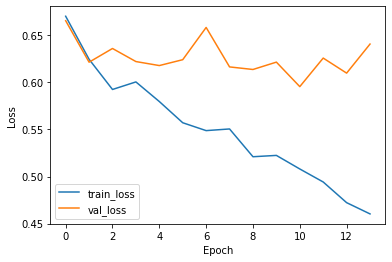

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 557ms/step - accuracy: 0.7083 - auc_8: 0.8057 - auc_9: 0.7338 - false_negatives_4: 7.1111 - false_positives_4: 38.2222 - loss: 0.6037 - precision_4: 0.6171 - recall_4: 0.8928 - true_negatives_4: 44.2222 - true_positives_4: 63.3333
Test Accuracy: 70.42%
Precision: 0.64
Recall: 0.90
AUC-ROC: 0.80
AUC-PR: 0.76
TP: 106.0, FP: 59.0, TN: 63.0, FN: 12.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 672ms/step
Confusion Matrix:
[[ 63  59]
 [ 12 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.52      0.64       122
           1       0.64      0.90      0.75       118

    accuracy                           0.70       240
   macro avg       0.74      0.71      0.69       240
weighted avg       0.74      0.70      0.69       240

AUC Score: 0.71

Precision: 0.6424242424242425
Recall: 0.8983050847457628
F1 Score: 0.7491166077738516
Cohen's Kappa Coefficient: 0.41
Matthews Correlation Coefficient (MCC): 0.45
Balanced Accu

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import random
import os

# Load the dataset and preprocess it
def load_images_from_folder(folder_path, label, target_size=(224, 224)):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image and label
        images.append(img)
        labels.append(label)
    return images, labels

# Define constants and paths
data_path = r"/home/l2-52/Downloads/ARVIND/oral-combined-dataset"
target_size = (224, 224)  # Define the target size for resizing
balanced_images = []
balanced_labels = []

# Load and preprocess data for NORMAL and OSCC classes
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    balanced_images.extend(images)
    balanced_labels.extend(labels)

# Convert images and labels to NumPy arrays
balanced_images = np.array(balanced_images)
balanced_labels = np.array(balanced_labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = balanced_images[balanced_labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = balanced_images[balanced_labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = balanced_labels[balanced_labels == 0][:600]
oscc_labels = balanced_labels[balanced_labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Resizing images to the size expected by InceptionV3 (299x299) and converting to RGB
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = tf.keras.Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for GRU
reshape = Reshape((1, -1))(flatten)

# Define the GRU layer
gru = GRU(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(gru)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Start training the model
start_time = time.time()

history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 1, 131072)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 128)            │    50,381,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,192,673 (275.39 MB)

 Trainable params: 50,389,889 (192.22 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5912 - auc_10: 0.6216 - auc_11: 0.6350 - false_negatives_5: 98.6774 - false_positives_5: 95.7097 - loss: 0.7367 - precision_5: 0.5835 - recall_5: 0.5692 - true_negatives_5: 158.6774 - true_positives_5: 157.9032 - val_accuracy: 0.6500 - val_auc_10: 0.6924 - val_auc_11: 0.6665 - val_false_negatives_5: 40.0000 - val_false_positives_5: 44.0000 - val_loss: 0.6434 - val_precision_5: 0.6393 - val_recall_5: 0.6610 - val_true_negatives_5: 78.0000 - val_true_positives_5: 78.0000
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6821 - auc_10: 0.7489 - auc_11: 0.7461 - false_negatives_5: 94.3226 - false_positives_5: 63.0645 - loss: 0.6027 - precision_5: 0.6994 - recall_5: 0.5910 - true_negatives_5: 196.1613 - true_positives_5: 157.4194 - val_accuracy: 0.6292 - val_auc_10: 0.7080 - val_auc_11: 0.6626 - val_false_negatives_5: 32.0000 - val_false_positives_5: 57.0000 - val_loss: 0.6367 - val_precision_5: 0.6014 - val_rec

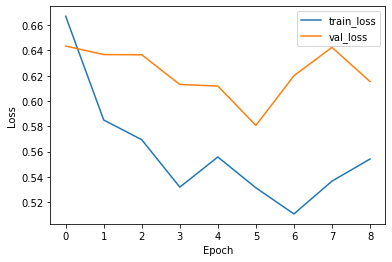

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 563ms/step - accuracy: 0.7049 - auc_10: 0.7570 - auc_11: 0.7006 - false_negatives_5: 19.8889 - false_positives_5: 25.0000 - loss: 0.5770 - precision_5: 0.6550 - recall_5: 0.6871 - true_negatives_5: 57.4444 - true_positives_5: 50.5556
Test Accuracy: 70.00%
Precision: 0.68
Recall: 0.73
AUC-ROC: 0.76
AUC-PR: 0.73
TP: 86.0, FP: 40.0, TN: 82.0, FN: 32.0
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 668ms/step
Confusion Matrix:
[[82 40]
 [32 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       122
           1       0.68      0.73      0.70       118

    accuracy                           0.70       240
   macro avg       0.70      0.70      0.70       240
weighted avg       0.70      0.70      0.70       240

AUC Score: 0.70

Precision: 0.6825396825396826
Recall: 0.7288135593220338
F1 Score: 0.7049180327868853
Cohen's Kappa Coefficient: 0.40
Matthews Correlation Coefficient (MCC): 0.40
Balanced Accura

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import random
import os

# Load the dataset and preprocess it
def load_images_from_folder(folder_path, label, target_size=(224, 224)):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image and label
        images.append(img)
        labels.append(label)
    return images, labels

# Define constants and paths
data_path = r"/home/l2-52/Downloads/ARVIND/oral-combined-dataset"
target_size = (224, 224)  # Define the target size for resizing
balanced_images = []
balanced_labels = []

# Load and preprocess data for NORMAL and OSCC classes
for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    images, labels = load_images_from_folder(class_path, 0 if class_name == 'NORMAL' else 1)
    balanced_images.extend(images)
    balanced_labels.extend(labels)

# Convert images and labels to NumPy arrays
balanced_images = np.array(balanced_images)
balanced_labels = np.array(balanced_labels)

# Ensure dataset is balanced by selecting 600 images from each class
normal_images = balanced_images[balanced_labels == 0][:600]  # Select 600 images from NORMAL class
oscc_images = balanced_images[balanced_labels == 1][:600]    # Select 600 images from OSCC class
normal_labels = balanced_labels[balanced_labels == 0][:600]
oscc_labels = balanced_labels[balanced_labels == 1][:600]

# Concatenate the normal and OSCC images and labels to create a balanced dataset
balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Resizing images to the size expected by InceptionV3 (299x299) and converting to RGB
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB

X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Convert grayscale to RGB

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer
input_layer = tf.keras.Input(shape=(299, 299, 3))

# Pass the input through InceptionV3 model
inception_output = base_model(input_layer, training=False)

# Flatten the output
flatten = Flatten()(inception_output)

# Reshape for GRU
reshape = Reshape((1, -1))(flatten)

# Define the GRU layer
gru = GRU(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(gru)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Start training the model
start_time = time.time()

history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')
print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Attention mechanism

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_564 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_564[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_564      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_565 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_564[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_565[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_565      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_566 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_565[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_566[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_566      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 73, 73,    │          0 │ activation_566[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_567 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_24… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_567[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_567      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_568 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_567[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_568[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_568      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 55,752,225 (212.68 MB)

 Trainable params: 33,949,441 (129.51 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 931ms/step - accuracy: 0.5577 - loss: 0.7475 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 906ms/step - accuracy: 0.4811 - loss: 0.6933 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 902ms/step - accuracy: 0.5017 - loss: 0.6931 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 902ms/step - accuracy: 0.5054 - loss: 0.6931 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 904ms/step - accuracy: 0.5048 - loss: 0.6931 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


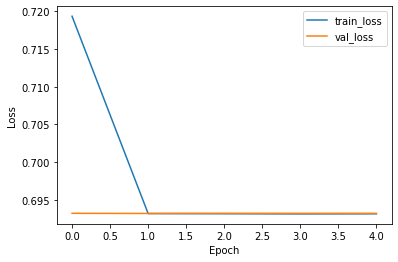

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.4423 - loss: 0.6935
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 661ms/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24      0.49      0.32       240

AUC Score: 0.50

Precision: 0.49166666666666664
Recall: 1.0
F1 Score: 0.659217877094972
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 151.19 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the custom attention mechanism
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
predictions = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_658 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_13[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_658[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_658      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_659 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_658[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_659[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_659      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_660 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_659[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_660[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_660      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_28    │ (None, 73, 73,    │          0 │ activation_660[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_661 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_28… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_661[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_661      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_662 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_661[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_662[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_662      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 55,752,225 (212.68 MB)

 Trainable params: 33,949,441 (129.51 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 934ms/step - accuracy: 0.5040 - loss: 0.7496 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 905ms/step - accuracy: 0.4891 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 904ms/step - accuracy: 0.4768 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 903ms/step - accuracy: 0.5151 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 905ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 904ms/step - accuracy: 0.4991 - loss: 0.6931 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


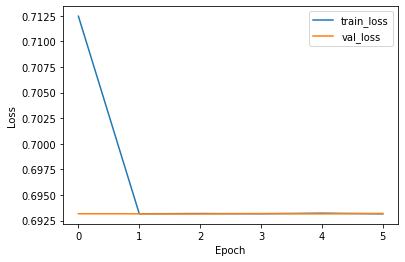

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 554ms/step - accuracy: 0.4423 - loss: 0.6932
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 655ms/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24      0.49      0.32       240

AUC Score: 0.50

Precision: 0.49166666666666664
Recall: 1.0
F1 Score: 0.659217877094972
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 178.48 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the custom attention mechanism
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
predictions = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_752 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_752[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_752      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_753 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_752[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_753[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_753      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_754 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_753[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_754[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_754      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_32    │ (None, 73, 73,    │          0 │ activation_754[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_755 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_32… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_755[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_755      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_756 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_755[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_756[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_756      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 55,752,225 (212.68 MB)

 Trainable params: 33,949,441 (129.51 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 938ms/step - accuracy: 0.4353 - loss: 0.7160 - val_accuracy: 0.4917 - val_loss: 0.6931
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 904ms/step - accuracy: 0.4860 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 905ms/step - accuracy: 0.5080 - loss: 0.6931 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 905ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.4917 - val_loss: 0.6932
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


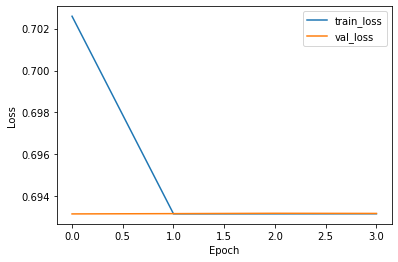

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.4423 - loss: 0.6932
Test Accuracy: 49.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step
Confusion Matrix:
[[  0 122]
 [  0 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.49      1.00      0.66       118

    accuracy                           0.49       240
   macro avg       0.25      0.50      0.33       240
weighted avg       0.24      0.49      0.32       240

AUC Score: 0.50

Precision: 0.49166666666666664
Recall: 1.0
F1 Score: 0.659217877094972
Cohen's Kappa Coefficient: 0.00
Matthews Correlation Coefficient (MCC): 0.00
Balanced Accuracy: 0.50
Time taken: 124.53 seconds


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Attention, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat the channel dimension to match InceptionV3 input

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load InceptionV3 model without top (no classification layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the convolutional layers of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Define the custom attention mechanism
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
attention_probs = Dense(np.prod(x.shape[1:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
predictions = Dense(1, activation='sigmoid')(attention_mul)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate Cohen's Kappa Coefficient
kappa = cohen_kappa_score(y_test, test_predictions)
print(f"Cohen's Kappa Coefficient: {kappa:.2f}")

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, test_predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

# Calculate Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")


# Capsule Network

2024-11-16 15:26:07.171618: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 15:26:07.175906: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:26:07.220939: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:26:07.275917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731750967.319706   13946 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731750967.33

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer (CapsuleLayer)    │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,600,769 (147.25 MB)

 Trainable params: 16,797,985 (64.08 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 744ms/step - accuracy: 0.5734 - loss: 0.6768 - val_accuracy: 0.6542 - val_loss: 0.6249
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 776ms/step - accuracy: 0.7344 - loss: 0.5407 - val_accuracy: 0.7083 - val_loss: 0.5865
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 779ms/step - accuracy: 0.8764 - loss: 0.3548 - val_accuracy: 0.7667 - val_loss: 0.5156
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 792ms/step - accuracy: 0.9465 - loss: 0.2162 - val_accuracy: 0.7792 - val_loss: 0.5426
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 835ms/step - accuracy: 0.9656 - loss: 0.1586 - val_accuracy: 0.7667 - val_loss: 0.5236
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 828ms/step - accuracy: 0.9726 - loss: 0.1321 - val_accuracy: 0.7583 - val_loss: 0.6002
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


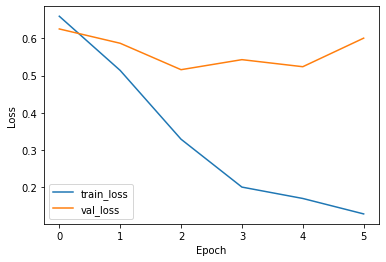

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.7938 - loss: 0.4717
Test Accuracy: 76.67%
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 657ms/step
Confusion Matrix:
[[101  21]
 [ 35  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       122
           1       0.80      0.70      0.75       118

    accuracy                           0.77       240
   macro avg       0.77      0.77      0.77       240
weighted avg       0.77      0.77      0.77       240

AUC Score: 0.77

Precision: 0.7980769230769231
Recall: 0.7033898305084746
F1 Score: 0.7477477477477478
Cohen's Kappa Coefficient: 0.5322939866369709
Matthews Correlation Coefficient (MCC): 0.535970438059201
Balanced Accuracy: 0.7656293414837455
Model predictions saved to: model_predictions.csv
Time taken: 155.85 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import InceptionV3
from sklearn.model_selection import train_test_split
import os

# Assuming the load_images_from_folder function is already defined
def load_images_from_folder(folder_path, label, target_size=(224, 224)):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
        labels.append(label)
    return images, labels

# Load and preprocess data
data_path = "/home/l2-52/Downloads/ARVIND/oral-combined-dataset"
all_images = []
all_labels = []

for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    label = 0 if class_name == 'NORMAL' else 1
    images, labels = load_images_from_folder(class_path, label)
    all_images.extend(images)
    all_labels.extend(labels)

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Balance the dataset by selecting 600 images per class
normal_images = all_images[all_labels == 0][:600]
oscc_images = all_images[all_labels == 1][:600]
normal_labels = all_labels[all_labels == 0][:600]
oscc_labels = all_labels[all_labels == 1][:600]

balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Resize images for InceptionV3 input (299x299)
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])

# Convert grayscale images to RGB (3 channels)
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Load pre-trained InceptionV3 model without top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(299, 299, 3))
inception_output = inception_base(input_tensor)
flatten = Flatten()(inception_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Start time before model training
start_time = time.time()

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=50, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time after model evaluation
end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")


2024-11-16 15:38:48.701590: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 15:38:48.706057: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:38:48.752793: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:38:48.806713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731751728.847894   15632 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731751728.86

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer (CapsuleLayer)    │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,600,769 (147.25 MB)

 Trainable params: 16,797,985 (64.08 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 766ms/step - accuracy: 0.6205 - loss: 0.6484 - val_accuracy: 0.6833 - val_loss: 0.5996
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 813ms/step - accuracy: 0.7833 - loss: 0.5045 - val_accuracy: 0.7208 - val_loss: 0.5700
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 829ms/step - accuracy: 0.8919 - loss: 0.3404 - val_accuracy: 0.7833 - val_loss: 0.4835
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 826ms/step - accuracy: 0.9539 - loss: 0.2149 - val_accuracy: 0.7583 - val_loss: 0.5189
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 823ms/step - accuracy: 0.9623 - loss: 0.1751 - val_accuracy: 0.7875 - val_loss: 0.5367
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 827ms/step - accuracy: 0.9931 - loss: 0.0974 - val_accuracy: 0.7333 - val_loss: 0.6595
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


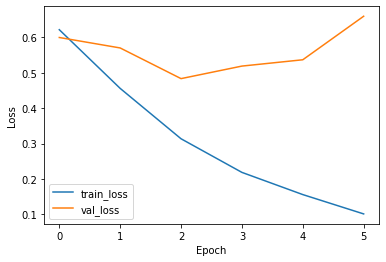

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.8025 - loss: 0.4561
Test Accuracy: 78.33%
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 660ms/step
Confusion Matrix:
[[92 30]
 [22 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       122
           1       0.76      0.81      0.79       118

    accuracy                           0.78       240
   macro avg       0.78      0.78      0.78       240
weighted avg       0.78      0.78      0.78       240

AUC Score: 0.78

Precision: 0.7619047619047619
Recall: 0.8135593220338984
F1 Score: 0.7868852459016393
Cohen's Kappa Coefficient: 0.5670274771024146
Matthews Correlation Coefficient (MCC): 0.5682896424541539
Balanced Accuracy: 0.783828841344818
Model predictions saved to: model_predictions.csv
Time taken: 159.61 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import InceptionV3
from sklearn.model_selection import train_test_split
import os

# Assuming the load_images_from_folder function is already defined
def load_images_from_folder(folder_path, label, target_size=(224, 224)):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
        labels.append(label)
    return images, labels

# Load and preprocess data
data_path = "/home/l2-52/Downloads/ARVIND/oral-combined-dataset"
all_images = []
all_labels = []

for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    label = 0 if class_name == 'NORMAL' else 1
    images, labels = load_images_from_folder(class_path, label)
    all_images.extend(images)
    all_labels.extend(labels)

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Balance the dataset by selecting 600 images per class
normal_images = all_images[all_labels == 0][:600]
oscc_images = all_images[all_labels == 1][:600]
normal_labels = all_labels[all_labels == 0][:600]
oscc_labels = all_labels[all_labels == 1][:600]

balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Resize images for InceptionV3 input (299x299)
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])

# Convert grayscale images to RGB (3 channels)
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Load pre-trained InceptionV3 model without top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(299, 299, 3))
inception_output = inception_base(input_tensor)
flatten = Flatten()(inception_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Start time before model training
start_time = time.time()

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=150, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time after model evaluation
end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")


2024-11-16 15:42:12.902652: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 15:42:12.907095: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:42:12.955794: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-16 15:42:13.011623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731751933.055284   16530 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731751933.06

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capsule_layer (CapsuleLayer)    │ (None, 160)            │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,600,769 (147.25 MB)

 Trainable params: 16,797,985 (64.08 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 790ms/step - accuracy: 0.4816 - loss: 0.7097 - val_accuracy: 0.5875 - val_loss: 0.6768
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 831ms/step - accuracy: 0.6674 - loss: 0.6506 - val_accuracy: 0.6750 - val_loss: 0.6179
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 827ms/step - accuracy: 0.7974 - loss: 0.4829 - val_accuracy: 0.7333 - val_loss: 0.5432
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 825ms/step - accuracy: 0.9134 - loss: 0.3256 - val_accuracy: 0.7542 - val_loss: 0.5519
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 828ms/step - accuracy: 0.9417 - loss: 0.2336 - val_accuracy: 0.7917 - val_loss: 0.4800
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 825ms/step - accuracy: 0.9733 - loss: 0.1461 - val_accuracy: 0.7792 - val_loss: 0.5422
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 825ms/step - accuracy: 0.9597 - loss: 0.1577 - val_accuracy: 0.7833 - val_loss: 0.5569
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 827ms/step - accuracy: 0.9787 - loss: 0.1005 - 

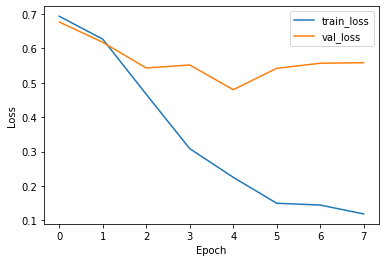

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 561ms/step - accuracy: 0.8148 - loss: 0.4400
Test Accuracy: 79.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 660ms/step
Confusion Matrix:
[[99 23]
 [27 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       122
           1       0.80      0.77      0.78       118

    accuracy                           0.79       240
   macro avg       0.79      0.79      0.79       240
weighted avg       0.79      0.79      0.79       240

AUC Score: 0.79

Precision: 0.7982456140350878
Recall: 0.7711864406779662
F1 Score: 0.7844827586206896
Cohen's Kappa Coefficient: 0.5829858215179317
Matthews Correlation Coefficient (MCC): 0.5833105140608716
Balanced Accuracy: 0.7913309252570159
Model predictions saved to: model_predictions.csv
Time taken: 210.51 seconds


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, Dense, Flatten, Input, Reshape
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import csv
from tensorflow.keras.applications import InceptionV3
from sklearn.model_selection import train_test_split
import os

# Assuming the load_images_from_folder function is already defined
def load_images_from_folder(folder_path, label, target_size=(224, 224)):
    images = []
    labels = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
        labels.append(label)
    return images, labels

# Load and preprocess data
data_path = "/home/l2-52/Downloads/ARVIND/oral-combined-dataset"
all_images = []
all_labels = []

for class_name in ['NORMAL', 'OSCC']:
    class_path = os.path.join(data_path, class_name)
    label = 0 if class_name == 'NORMAL' else 1
    images, labels = load_images_from_folder(class_path, label)
    all_images.extend(images)
    all_labels.extend(labels)

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Balance the dataset by selecting 600 images per class
normal_images = all_images[all_labels == 0][:600]
oscc_images = all_images[all_labels == 1][:600]
normal_labels = all_labels[all_labels == 0][:600]
oscc_labels = all_labels[all_labels == 1][:600]

balanced_images = np.concatenate([normal_images, oscc_images])
balanced_labels = np.concatenate([normal_labels, oscc_labels])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Resize images for InceptionV3 input (299x299)
X_train_resized = np.array([cv2.resize(img, (299, 299)) for img in X_train])
X_test_resized = np.array([cv2.resize(img, (299, 299)) for img in X_test])

# Convert grayscale images to RGB (3 channels)
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Load pre-trained InceptionV3 model without top layers
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of InceptionV3
for layer in inception_base.layers:
    layer.trainable = False

# Define the custom Capsule Network layer
input_tensor = Input(shape=(299, 299, 3))
inception_output = inception_base(input_tensor)
flatten = Flatten()(inception_output)
x = Dense(128, activation='relu')(flatten)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Start time before model training
start_time = time.time()

# Train the model with early stopping and 50 epochs
history = model.fit(X_train_resized, y_train, epochs=200, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# Save the model predictions to a CSV file
csv_file = "model_predictions.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['True_Label', 'Predicted_Label'])
    writer.writerows(zip(y_test, test_predictions))

print("Model predictions saved to:", csv_file)

# End time after model evaluation
end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")
